In [1]:
import dask
import time

In [2]:
def square(n):
    time.sleep(1)
    return n * n
    
def add(m, n):
    time.sleep(1)
    return m * n

In [3]:
%%time 

x = square(1)
y = square(2)
z = add(x, y)

CPU times: user 1.48 ms, sys: 0 ns, total: 1.48 ms
Wall time: 3 s


## Building a computational graph
***

In [4]:
x = dask.delayed(square)(1)
y = dask.delayed(square)(2)
z = dask.delayed(add)(x, y)

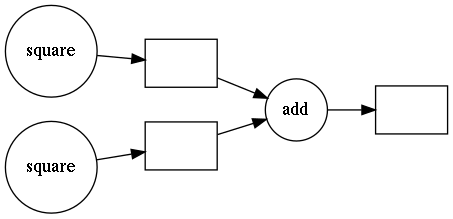

In [5]:
z.visualize(rankdir='LR')

In [6]:
z.visualize?

Signature: z.visualize(filename='mydask', format=None, optimize_graph=False, **kwargs)
Docstring:
Render the computation of this object's task graph using graphviz.

Requires ``graphviz`` to be installed.

Parameters
----------
filename : str or None, optional
    The name (without an extension) of the file to write to disk.  If
    `filename` is None, no file will be written, and we communicate
    with dot using only pipes.
format : {'png', 'pdf', 'dot', 'svg', 'jpeg', 'jpg'}, optional
    Format in which to write output file.  Default is 'png'.
optimize_graph : bool, optional
    If True, the graph is optimized before rendering.  Otherwise,
    the graph is displayed as is. Default is False.
color: {None, 'order'}, optional
    Options to color nodes.  Provide ``cmap=`` keyword for additional
    colormap
**kwargs
   Additional keyword arguments to forward to ``to_graphviz``.

Examples
--------
>>> x.visualize(filename='dask.pdf')  # doctest: +SKIP
>>> x.visualize(filename='dask.pdf

In [6]:
%%time
z.compute()

CPU times: user 8.08 ms, sys: 0 ns, total: 8.08 ms
Wall time: 2.01 s


4

***
<mark>Question</mark> Rewrite the following cell so it's executed lazily.
 * Which functions should be delayed? `square`? `sum`? Both of them? Why?
 * Visualize the graph.
 * Compare the execution time with the sequential execution.

In [7]:
x = [square(i) for i in range(10)]
y = sum(x)
y

285

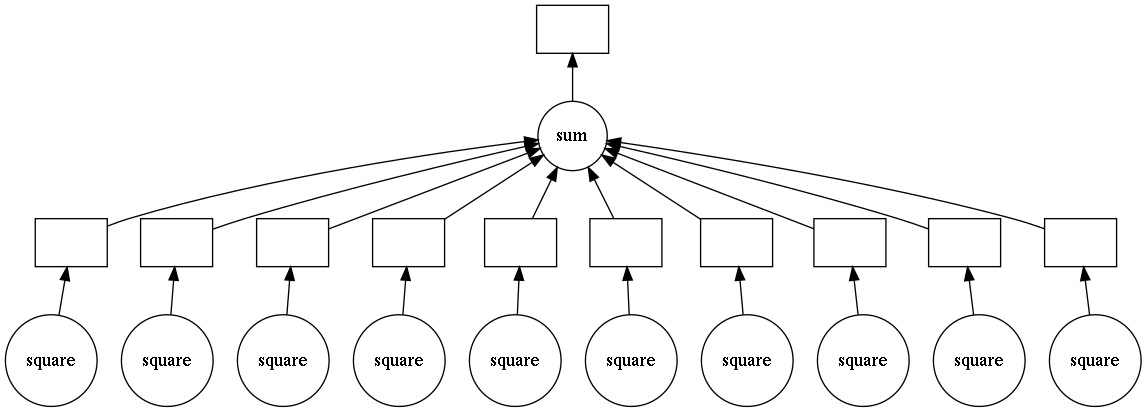

In [7]:
x = [dask.delayed(square)(i) for i in range(10)]
y = dask.delayed(sum)(x)
y.visualize()

In [12]:
%load solutions/exercise1.py

<mark>Question</mark> Try a number of tasks larger and then shorter than the number of threads of the processor (24 for the gpu partition of Piz Daint). How much time it's going to take for 24 tasks and how much for 25?

***
<mark>Question</mark> Rewrite the following cell so it's executed lazily.
 * Which functions should be delayed?
 * Visualize the graph.
 * Compare the execution time with the sequential execution.

In [13]:
x = []
for i in range(10):
    x.append(square(i))

y = sum(x)

In [15]:
%load solutions/exercise2.py

***
<mark>Question</mark> Rewrite the following cell so it's executed lazily.
 * Which functions should be delayed?
 * Visualize the graph.

In [17]:
x = []
for i in range(10):
    if i % 2 == 0:
        x.append(square(i))
    else:
        x.append(add(i, i))

y = sum(x)

In [8]:
# %load solutions/exercise3.py
x = []
for i in range(10):
    if i % 2 == 0:
        x.append(dask.delayed(square)(i))
    else:
        x.append(dask.delayed(add)(i, i))

y = dask.delayed(sum)(x)

# use `y.visualize()` to visualize the graph and `y.compute()` to execute it.
